### Macro Economic Variables 

Economic Data gives an indication of the overall health of an economy. Metrics for unemployment, sales, output are published monthly, quarterly or annually.

Market Data represents prices.  Market data includes stock prices, bond prices, FX rates (the price of a currency), bond prices and interest rates (the price of money). Prices are market quotes in an intraday format or end of day format. We have sourced end of day prices as the granularity of intraday prices is not required.

This workbook contains economic data and market data sourced independently from the loans dataset.
All the series come from from : "www.macrotrends.net"

DISCLAIMER AND TERMS OF USE: HISTORICAL DATA IS PROVIDED "AS IS" AND SOLELY
FOR INFORMATIONAL PURPOSES - NOT FOR TRADING PURPOSES OR ADVICE.
NEITHER MACROTRENDS LLC NOR ANY OF OUR INFORMATION PROVIDERS WILL BE LIABLE
FOR ANY DAMAGES RELATING TO YOUR USE OF THE DATA PROVIDED.

* For NATIONAL UNEMPLOYMENT do follow: https://www.macrotrends.net/1316/us-national-unemployment-rate
* For RETAIL SALES do follow:https://www.macrotrends.net/1371/retail-sales-historical-chart
* For TED SPREAD do follow: https://www.macrotrends.net/1447/ted-spread-historical-chart 
* For VIX do follow: https://www.macrotrends.net/2603/vix-volatility-index-historical-chart

### This Note book:

Imports US national monthly unemployment rates from a csv sourced from macrotrends.net 
Imports daily VIX end of day quotes from a csv sourced from macrotrends.net
Imports daily Ted spread end of day quotes from a csv sourced from macrotrends.net
Imports monthly retail sales date for the US



### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import pickle
import clockwork_orange as clockwork

In [2]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

### Import Economic and Market Data 

Economic Data gives an indication of the overall health of an economy. Metrics for key variables such as unemployment, sales, output are published monthly, quarterly or annually.

Market Data represents prices.  Prices include stock prices, bond prices, FX rates (the price of a currency), bond prices and interest rates (the price of money). Prices come from market quotes which intraday format or end of day format. We have sourced end of day prices.

The consumer loan dataset has a field month of issue date 'issue_d'. The market and economic variables will be mapped using this field. 

### Economic Data

### Unemployment

National Unemployment rates re published monthly in the US.  Our loan data has a month of issue feature so we will be able to map unemployment to month of issue for each loan.
We would expect unemployment to have a postive relationship with the probability of default. As unemployment increases, it would be reasonable to expect default and the probabilty of default to increase.

In [3]:
unemployment_data_backup = pd.read_csv('../data/nat_unemployment.csv')

In [4]:
unemployment_data = unemployment_data_backup.copy()

In [5]:
unemployment_data.head()

,date,nat_unemp,concat
0,01/01/2007,4.6,Jan-07
1,01/02/2007,4.5,Feb-07
2,01/03/2007,4.4,Mar-07
3,01/04/2007,4.5,Apr-07
4,01/05/2007,4.4,May-07


In [6]:
unemployment_data = clockwork.monthly_data(unemployment_data, 'nat_unemp')
unemployment_data.head(2)

,issue_d,nat_unemp
0,Jan-07,4.6
1,Feb-07,4.5


### Retail Sales
Retail sales figures are published monthly in the US, so we can join retail sales data to indiviual loans in a similar way to unemployment. Retail sales are interesting because increasing reatil sales are an indicator of an economy doing well, so we could expect increaing retails sales to be related to a lower probability of default, or we could expect increasing sales to be related to loose credit policy and increased defaults. We will have to wait and see.....

Economic and finacial data is capricious in nature.... 

In [7]:
retail_data_backup = pd.read_csv('../data/retail-sales.csv')

In [8]:
retail_data = retail_data_backup.copy()

In [9]:
retail_data = clockwork.monthly_data(retail_data, 'retail_sales')
retail_data.head(2)

,issue_d,retail_sales
0,Jan-07,1.000000
1,Feb-07,0.997208


### Market Data: Daily Data

Daily data will be transformed to a monthly equivalent to make it compatible the loans data set.  It is reasonable to assume that the consumer loans market is influenced by the market prices but daily price swings impact main street less than wall street, but the effects will feed into the consumer loans markets.  

Given we have daily data and need monthly metrics we are able to engineer additional features such as monthly min, max, and spread between min and max, max daily spread, etc.

### The Vix Volatility Index: Uncertainty

The VIX is traded Volatility Index that is based on S&P500 call and put option prices. You can buy futures and options on the index. 
The VIX Index is a calculation designed to produce a measure of constant, 30-day expected volatility of the U.S. stock market, derived from real-time, mid-quote prices of S&P 500® Index (SPXSM) call and put options. On a global basis, it is one of the most recognized measures of volatility -- widely reported by financial media and closely followed by a variety of market participants as a daily market indicator.
Basically when the VIX goes up volatility is increasing and there is more uncertainty in the economy. We would VIX increases to be associated with higher levels of default.  


Here is a link to the Chicago Board of Exchange VIX Page http://www.cboe.com/vix

In [10]:
vix_data_backup = pd.read_csv('../data/vix-daily-data.csv')

In [11]:
vix_data = vix_data_backup.copy()

In [12]:
vix_data.rename(columns={'concat':'issue_d'}, inplace=True)
vix_data = vix_data[['date', 'vix', 'issue_d']]
vix_data.head(2)

,date,vix,issue_d
0,03/01/2007,12.04,Jan-07
1,04/01/2007,11.51,Jan-07


In [13]:
date_map = vix_data.copy()
date_map = date_map.iloc[:,:3].astype(str)
date_map = pd.DataFrame(date_map)
date_map['ts_date'] = '01-' + date_map['issue_d'].astype(str)

date_map.drop('vix', axis=1, inplace=True)
date_map.drop('date', axis=1, inplace=True)

len(date_map)
df = date_map['ts_date'].unique()
df2 = date_map['issue_d'].unique()

dates_map = dict(zip(df2, df))

In [14]:
vix_data = clockwork.mkt_data_transform(vix_data,'vix')

In [15]:
vix_data["issue_d"] = vix_data.index.astype(str)
vix_data["year"] = '01-' + vix_data.index.astype(str)
vix_data.index = vix_data["year"]
vix_data

,vix_mean,vix_min,vix_max,vix_spread,issue_d,year
year,,,,,,
01-Apr-07,12.93,11.98,14.53,2.55,Apr-07,01-Apr-07
01-Apr-08,21.56,19.59,23.82,4.23,Apr-08,01-Apr-08
01-Apr-09,38.06,33.94,42.28,8.34,Apr-09,01-Apr-09
01-Apr-10,17.42,15.58,22.81,7.23,Apr-10,01-Apr-10
01-Apr-11,16.24,14.62,17.87,3.25,Apr-11,01-Apr-11
...,...,...,...,...,...,...
01-Sep-15,24.38,20.14,31.40,11.26,Sep-15,01-Sep-15
01-Sep-16,14.22,11.94,18.14,6.20,Sep-16,01-Sep-16
01-Sep-17,10.44,9.51,12.23,2.72,Sep-17,01-Sep-17


### Ted Spread: Credit Risk

The Ted Spread is a spread between USD 3M Libor and the interest rate on short term treasury bills (T-Bills)*
It is considered as a measure of credit risk. when credit risk is high 3M Libor increases and the spread to T-Bills widens, and when credit risk is low the spread narrows.

(IBOR = Interbank Offered Rate, which is the rate banks lend to each other)
(Ted spread calculation will change after the cessation of Libor. Ibor transition will be to SOFR Secured Overnight Funding Rate ). There will be a SOFR Spread soon!

https://www.investopedia.com/terms/t/tedspread.asp

In [16]:
ted_spread_data_backup = pd.read_csv('../data/ted-spread-daily-data.csv')
ted_spread_data = ted_spread_data_backup.copy()
ted_spread_data.head()

,date,value,day,month,mnth,concat
0,02/01/2007,0.42,1,2007,Jan-,Jan-07
1,03/01/2007,0.44,1,2007,Jan-,Jan-07
2,04/01/2007,0.45,1,2007,Jan-,Jan-07
3,05/01/2007,0.44,1,2007,Jan-,Jan-07
4,08/01/2007,0.41,1,2007,Jan-,Jan-07


In [17]:
ted_spread_data = clockwork.mkt_data_trim(ted_spread_data,'ted_spread')
ted_spread_data.head()

C:\Users\User1\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,date,ted_spread,issue_d
0,02/01/2007,0.42,Jan-07
1,03/01/2007,0.44,Jan-07
2,04/01/2007,0.45,Jan-07
3,05/01/2007,0.44,Jan-07
4,08/01/2007,0.41,Jan-07


In [18]:
ted_spread_data = clockwork.mkt_data_transform(ted_spread_data,'ted_spread')

In [19]:
len(ted_spread_data) == len(vix_data)

True

In [20]:
macro_data = pd.merge(vix_data, ted_spread_data, on='issue_d')

In [21]:
import datetime

In [22]:
macro_data['year']=pd.to_datetime(macro_data['year'])
macro_data.index = macro_data["year"]

len(macro_data)

156

In [23]:
macro_data.head(2)

,vix_mean,vix_min,vix_max,vix_spread,issue_d,year,ted_spread_mean,ted_spread_min,ted_spread_max,ted_spread_spread
year,,,,,,,,,,
2007-04-01,12.93,11.98,14.53,2.55,Apr-07,2007-04-01,0.49,0.43,0.57,0.14
2008-04-01,21.56,19.59,23.82,4.23,Apr-08,2008-04-01,1.50,1.28,1.68,0.40


Let's put all the macro economic series and features we have created together in one dataframe to use later

In [24]:
macro_data = pd.merge(macro_data, unemployment_data, on='issue_d')
macro_data.index = macro_data["year"]
macro_data = macro_data.sort_index()

macro_data.head(2)

,vix_mean,vix_min,vix_max,vix_spread,issue_d,year,ted_spread_mean,ted_spread_min,ted_spread_max,ted_spread_spread,nat_unemp
year,,,,,,,,,,,
2007-01-01,11.04,9.89,12.14,2.25,Jan-07,2007-01-01,0.38,0.35,0.45,0.10,4.6
2007-02-01,11.16,10.02,18.31,8.29,Feb-07,2007-02-01,0.33,0.31,0.37,0.06,4.5


In [25]:
macro_data = pd.merge(macro_data, retail_data, on='issue_d')
macro_data.index = macro_data["year"]
macro_data = macro_data.sort_index()
macro_data.head(2)

,vix_mean,vix_min,vix_max,vix_spread,issue_d,year,ted_spread_mean,ted_spread_min,ted_spread_max,ted_spread_spread,nat_unemp,retail_sales
year,,,,,,,,,,,,
2007-01-01,11.04,9.89,12.14,2.25,Jan-07,2007-01-01,0.38,0.35,0.45,0.10,4.6,1.000000
2007-02-01,11.16,10.02,18.31,8.29,Feb-07,2007-02-01,0.33,0.31,0.37,0.06,4.5,0.997208


In [26]:
import matplotlib.pyplot as plt

In [27]:
def macro_plot(series_1,series_2, series_3,title):
        
    plt.plot(macro_data['year'], macro_data[series_1], color='b')
    plt.plot(macro_data['year'], macro_data[series_2], color='y')
    plt.plot(macro_data['year'], macro_data[series_3], color='r')
    plt.xlabel('year')
    plt.ylabel(title)
    plt.title('Spread in %')
    plt.show()  

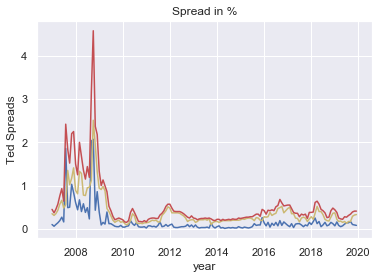

In [28]:
macro_plot('ted_spread_spread','ted_spread_min', 'ted_spread_max','Ted Spreads')    

It can be seen that the vix monthly min max and mean all seem to represent the same underlying process so it so we will only choose one of them to go into the PD model.
We could explore a monthly max(vix_max - vix_min) variable as a feature representing a volatility of volatility component, but it is probably a bit too fancy our model.   

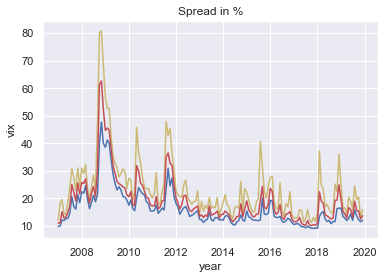

In [29]:
macro_plot('vix_min','vix_max', 'vix_mean', 'vix')    

Let's plot the four series together to check there are no show stopping general themes:

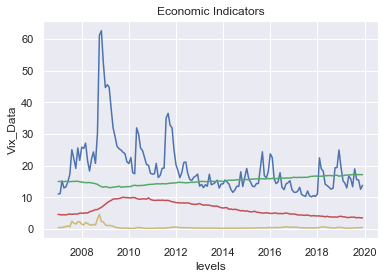

In [30]:
plt.plot(macro_data['year'], macro_data['vix_mean'], color='b')
plt.plot(macro_data['year'], macro_data['ted_spread_max'], color='y')
plt.plot(macro_data['year'], macro_data['nat_unemp'], color='r')
plt.plot(macro_data['year'], macro_data['retail_sales']*15, color='g')

plt.xlabel('levels')
plt.ylabel('Vix_Data')
plt.title('Economic Indicators')
plt.show()

In [31]:
macro_data.to_pickle("../data/macro_variables.pkl")